In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv("/home/maxim/DS/Phase_0/Phase_0_final_proj/Phase0-Project/tmp_data/data_for_graph").drop(columns=['Unnamed: 0'])

# Сводная ЖК - количество предложений, средняя стоимость, залог (М)


In [3]:
data.columns

Index(['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Ремонт',
       'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Залог'],
      dtype='object')

In [4]:
pivot_mean = pd.pivot_table(
    data=data,  # указываем источник данных
    values='Цена',  # список столбцов для агрегации
    index='Название ЖК',  # столбец для группировки по строкам
    # columns=,  # столбец для группировки по столбцам
    aggfunc='mean')  # функция агрегации

pivot_mean

,Цена
Название ЖК,
1147,110857.142857
"1147, 2019",90714.285714
"1147, 2020",85000.000000
"17-й пр-д Марьиной Рощи, 2015",50000.000000
4YOU,22000.000000
...,...
"е.квартал ""Мир внутри"", 2017",74500.000000
"е.квартал ""Мир внутри"", 2018",80000.000000
"мой адрес В Зеленограде, 2013",21000.000000


# Сводная таблица по метро

In [5]:
# Сводная Метро - медиана цена (М)


df_clean = data.dropna(subset=['Метро'])
df_clean = df_clean[df_clean['Метро'].apply(lambda x: not isinstance(x, float))]

def cleaner(text):
    clean_text = re.sub(r'\s*\([^)]*\)', '', text)
    return clean_text

# print(splitter('"м. улица Народного ополчения (8 мин на машине)"'))
# df_clean['Метро'] = df_clean['Метро'].apply(splitter)

In [16]:
df_clean['Метро'] = df_clean['Метро'].apply(cleaner)
df_clean['Метро'] 

0        м. Смоленская
1        м. Смоленская
2        м. Смоленская
3        м. Смоленская
4         м. Арбатская
             ...      
23363      м. Говорово
23364      м. Солнцево
23365      м. Солнцево
23366      м. Солнцево
23367      м. Говорово
Name: Метро, Length: 22053, dtype: object

In [7]:
pivot_mean = pd.pivot_table(
    data=df_clean,  # указываем источник данных
    values='Цена',  # список столбцов для агрегации
    index='Метро',  # столбец для группировки по строкам
    # columns=,  # столбец для группировки по столбцам
    aggfunc='mean')  # функция агрегации

pivot_mean

,Цена
Метро,
м. Авиамоторная,66287.822430
м. Автово,25201.736842
м. Автозаводская,66075.421053
м. Адмиралтейская,156500.000000
м. Академическая,62226.033088
...,...
м. Юго-Западная,82717.318841
м. Южная,47273.835616
м. Ясенево,46062.110236


# Барплот Дети/животные - количество объявлений 

<Axes: xlabel='Можно с детьми/животными', ylabel='Count'>

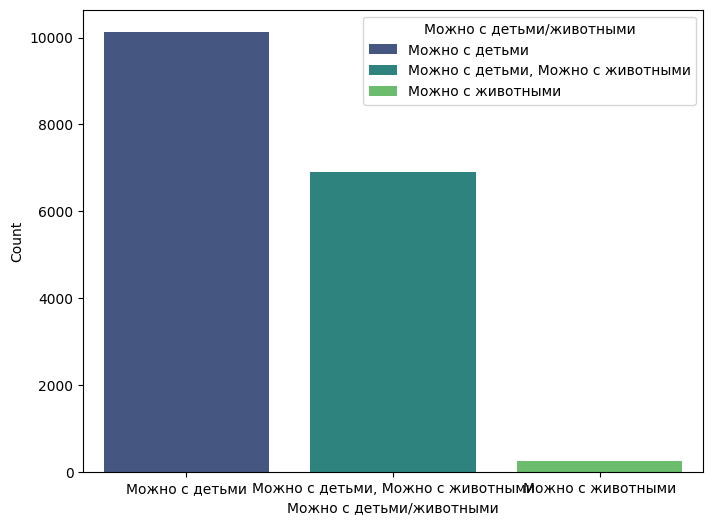

In [8]:
# Барплот Дети/животные - количество объявлений 

grouped = data.groupby(by='Можно с детьми/животными').agg(Count = ('ID  объявления', 'count'))

# grouped = data.groupby('day').agg(mean_bill = ('total_bill', 'mean')).reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x=grouped.index, y='Count', data=grouped, hue=grouped.index, palette='viridis', legend=True)


# Боксплот количество комнат - цена (М)

In [9]:
# Боксплот количество комнат - цена (М)

def intchanger(text):
    try:
        res = int(''.join(list(filter(lambda x: x.isdigit() == True, text))))
        return (res)
    except:
        return None


In [10]:
temp = data


In [11]:

temp['Количество комнат'] = temp['Количество комнат'].apply(intchanger)

In [12]:
temp = temp.dropna(subset=['Количество комнат'])
temp['Количество комнат'] = temp['Количество комнат'].astype('int')

/tmp/ipykernel_32335/3174798588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Количество комнат'] = temp['Количество комнат'].astype('int')


In [13]:
temp

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Залог
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,500000.0,Дизайнерский,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,500000.0
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,500000.0,Дизайнерский,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,500000.0
2,271173086,4,Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,500000.0,Евроремонт,...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,500000.0
3,272197456,4,Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,400000.0,Евроремонт,...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,400000.0
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,225000.0,Евроремонт,...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,225000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23361,202336163,1,Квартира,м. Солнцево (10 мин пешком),"Москва, Солнцевский проспект, 32, ш. Боровское...",32.0/19.0/6.0,"9/9, Панельный",NaN,35000.0,Косметический,...,На улицу,Совмещенный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,NaN,2.64,Пасс (1),Да,35000.0
23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,45000.0,Евроремонт,...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,45000.0
23365,268679909,2,Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,50000.0,Дизайнерский,...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,50000.0
23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,55000.0,Евроремонт,...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,50000.0


<Axes: xlabel='Количество комнат', ylabel='Цена'>

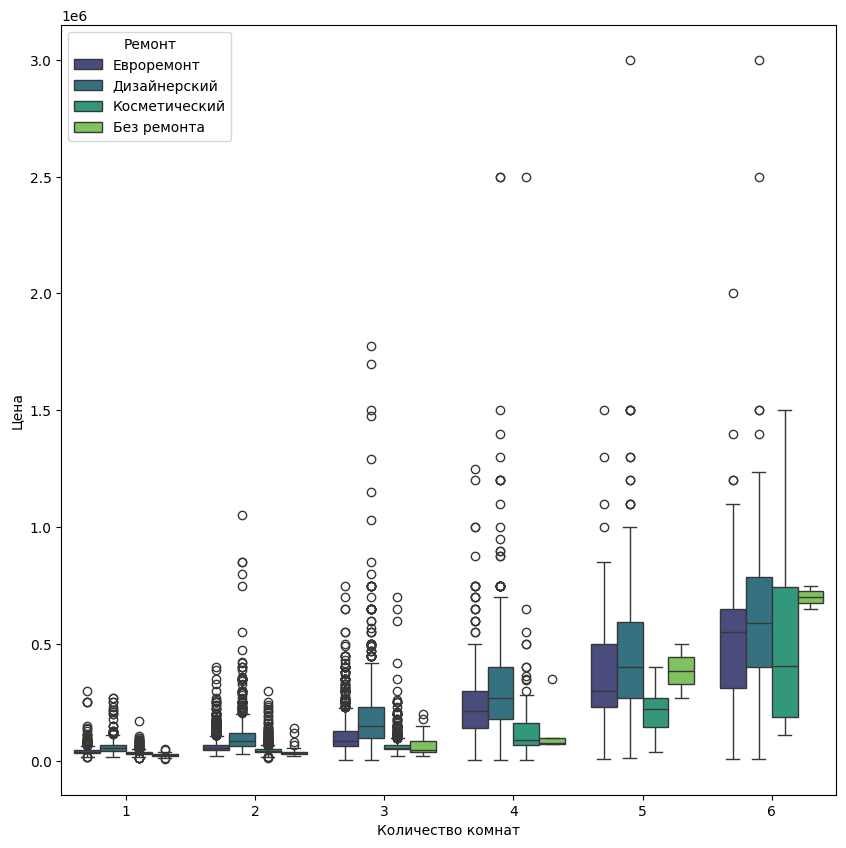

In [14]:
# x = temp['Количество комнат']
# y = temp['Цена']

fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Количество комнат', y='Цена',
            hue="Ремонт", palette='viridis',
            data=temp)

# sns.despine(offset=10, trim=True)

# Дескрайб 

In [15]:
data.describe()

,ID объявления,Количество комнат,Цена,"Высота потолков, м",Залог
count,2.336800e+04,22327.000000,2.336800e+04,11206.00000,2.245800e+04
mean,2.676265e+08,2.013885,8.289414e+04,2.98345,5.202616e+05
std,1.876862e+07,1.000575,1.226962e+05,7.61472,6.525998e+07
min,1.072986e+08,1.000000,5.000000e+03,1.20000,1.000000e+00
25%,2.712663e+08,1.000000,3.700000e+04,2.64000,3.500000e+04
50%,2.739030e+08,2.000000,4.950000e+04,2.64000,4.800000e+04
75%,2.746872e+08,3.000000,7.500000e+04,2.80000,7.500000e+04
max,2.750064e+08,6.000000,3.000000e+06,320.00000,9.779779e+09
